## Decision Tree - Company Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### We have to convert Sales continuous data to categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
n_bins = 3
y = label_encoder.fit_transform(pd.cut(df['Sales'], n_bins, retbins=True)[0])

In [6]:
pd.cut(df['Sales'], n_bins, retbins=True)[0].dtype

CategoricalDtype(categories=[(-0.0163, 5.423], (5.423, 10.847], (10.847, 16.27]],
              ordered=True)

### So we can see that Sales data is now transformed into 3 bins(categories)

In [7]:
df.Sales =y

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


### lets check for null values

In [9]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### No Null values present in data set so we are good to go with feature engineering (creating dummy variables for ShelveLoc, Urban, US variables)

In [10]:
dummy_shel = pd.get_dummies(df.ShelveLoc)

In [11]:
df = pd.concat([df.drop("ShelveLoc",axis=1),dummy_shel],axis=1)

In [12]:
df = pd.get_dummies(df,drop_first=True)

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium,Urban_Yes,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,1,1
1,2,111,48,16,260,83,65,10,0,1,0,1,1
2,1,113,35,10,269,80,59,12,0,0,1,1,1
3,1,117,100,4,466,97,55,14,0,0,1,1,1
4,0,141,64,3,340,128,38,13,1,0,0,1,0


### Lets Visualize data

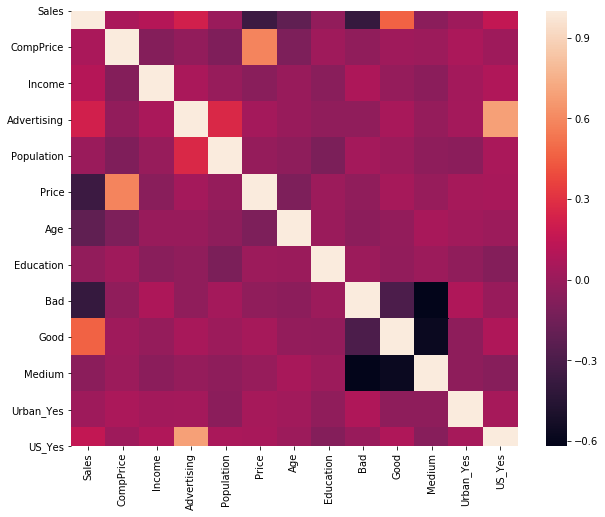

In [14]:
# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

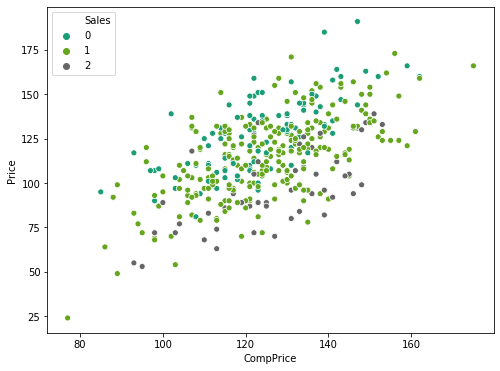

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='CompPrice',y='Price',data=df,hue='Sales',palette='Dark2')

### Lets create X and y variables and split them for training and testing

In [16]:
X= df.drop("Sales",axis=1)
y= df.Sales

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating Models

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
pred1 = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

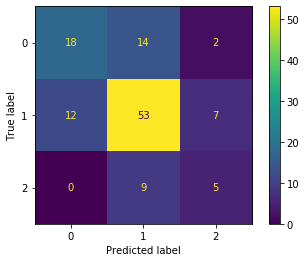

In [24]:
plot_confusion_matrix(model,X_test,y_test)

In [25]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        34
           1       0.70      0.74      0.72        72
           2       0.36      0.36      0.36        14

    accuracy                           0.63       120
   macro avg       0.55      0.54      0.55       120
weighted avg       0.63      0.63      0.63       120



### Basic Model performance factors are not so satifying, lets try some more models by changing hyper-parameters

In [26]:
model2 = DecisionTreeClassifier(criterion='entropy')

In [27]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
pred2 = model2.predict(X_test)

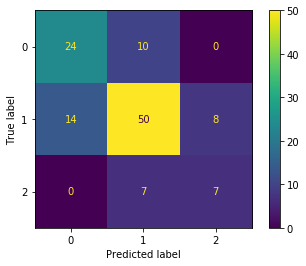

In [29]:
plot_confusion_matrix(model2,X_test,y_test)

In [30]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        34
           1       0.75      0.69      0.72        72
           2       0.47      0.50      0.48        14

    accuracy                           0.68       120
   macro avg       0.61      0.63      0.62       120
weighted avg       0.68      0.68      0.68       120



In [31]:
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [32]:
model3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [33]:
pred3 = model3.predict(X_test)

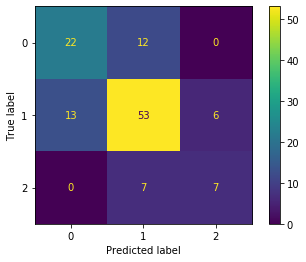

In [34]:
plot_confusion_matrix(model3,X_test,y_test)

In [35]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64        34
           1       0.74      0.74      0.74        72
           2       0.54      0.50      0.52        14

    accuracy                           0.68       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.68      0.68      0.68       120



In [36]:
model4 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=8,max_depth=3)

In [37]:
model4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=8)

In [38]:
pred4 = model4.predict(X_test)

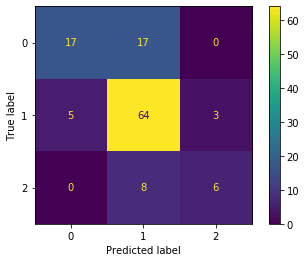

In [39]:
plot_confusion_matrix(model4,X_test,y_test)

In [40]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.77      0.50      0.61        34
           1       0.72      0.89      0.80        72
           2       0.67      0.43      0.52        14

    accuracy                           0.73       120
   macro avg       0.72      0.61      0.64       120
weighted avg       0.73      0.72      0.71       120



### Model4 performance matrics are some what satifying, Lets visualize the tree

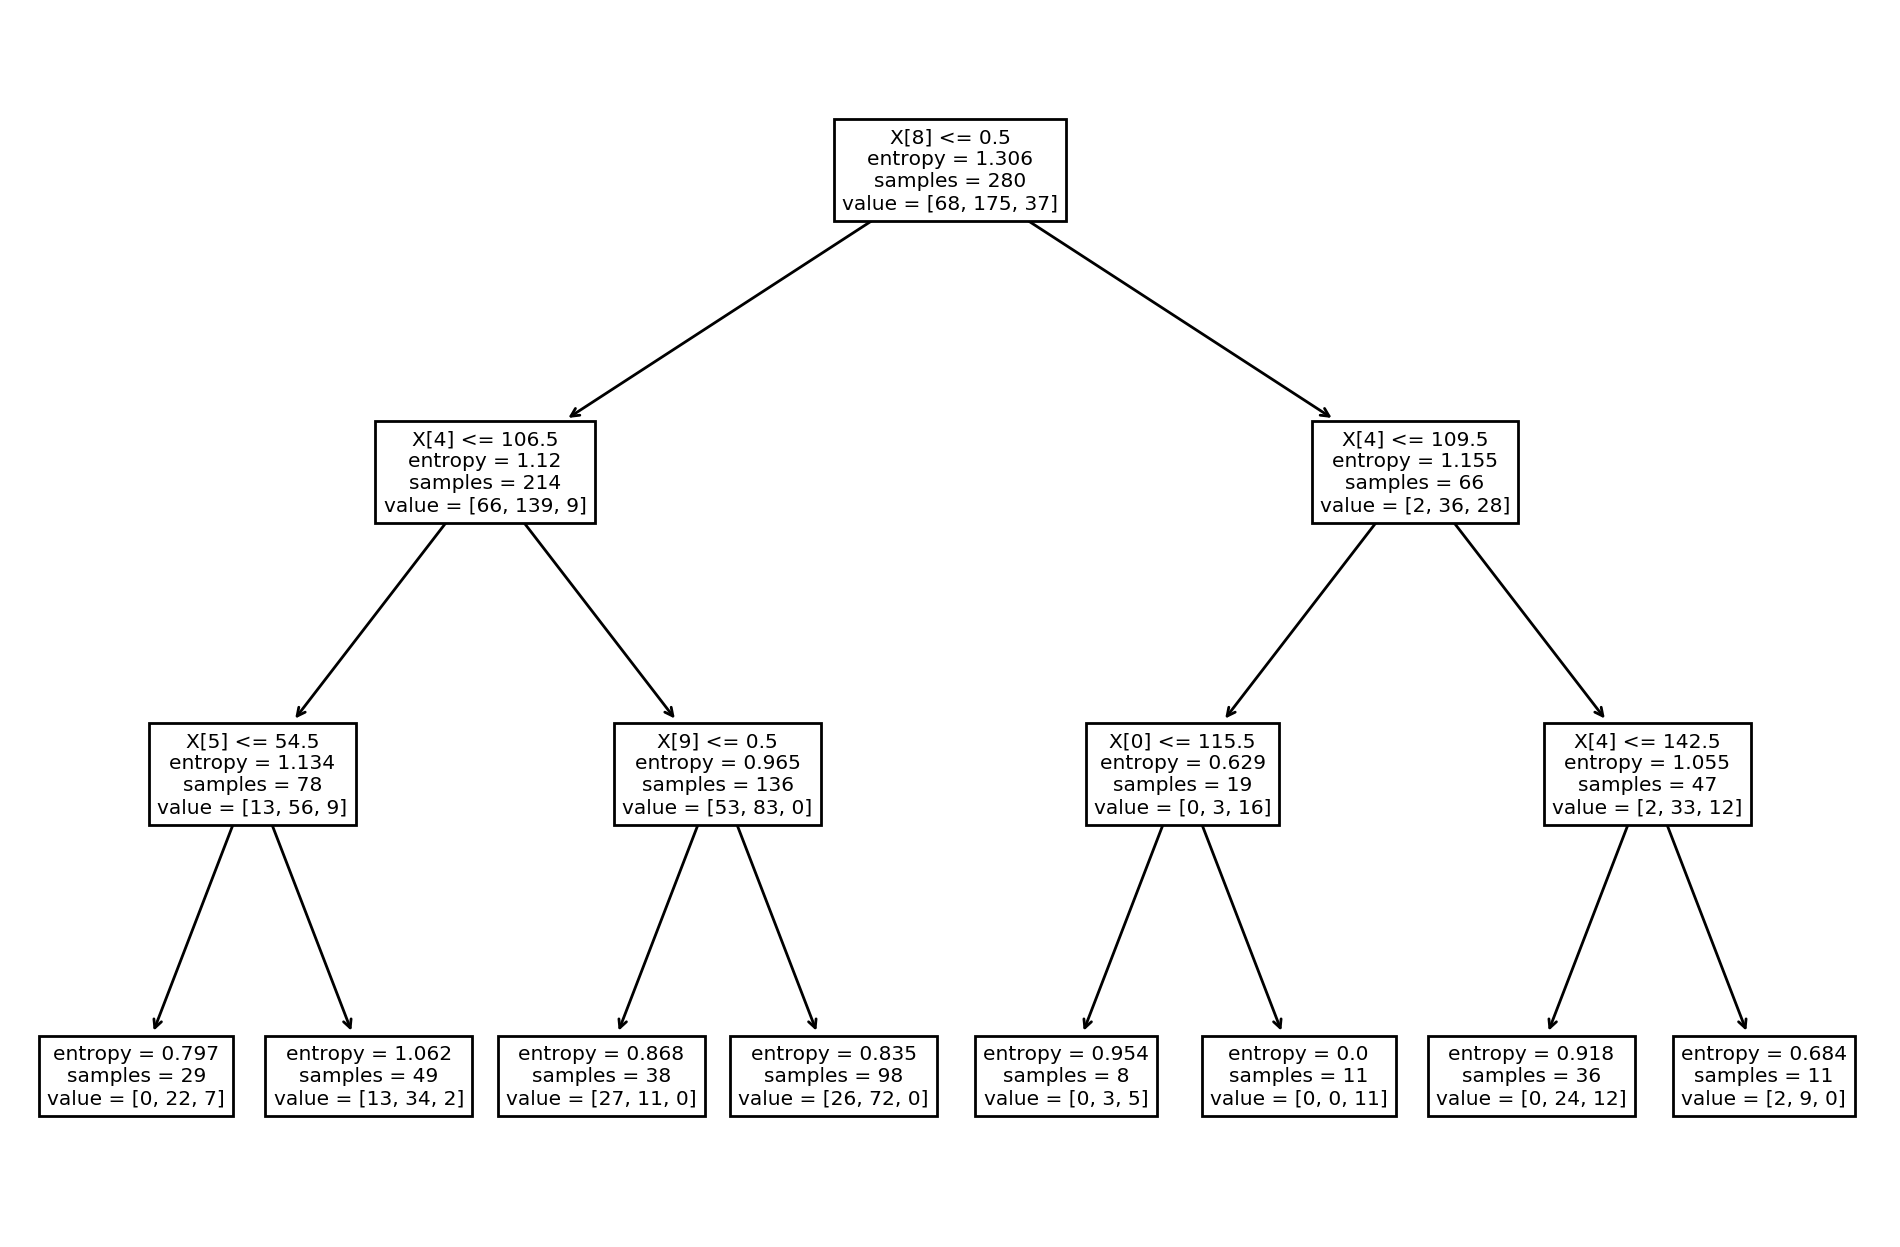

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model4);